# The most common programming languages used in Germany.

This project (Write a Data Science Blog Post) is part of Udacity Data Scientists (Nanodegree Program).This states data analysis using Stackoverflow’s 2021 and 2022 Annual Developer Survey.

<img src='https://miro.medium.com/max/1400/1*YMFKP8e6kR9cbM3IKXBtLw.png'></img>

## Introduction

With the development technologies in Germany in the software development field, many many programming languages are now experiencing a rise in popularity.
You may have already heard **“Python is the programming language of the moment”** or **“Functional Paradigm is much better than Object Oriented”**.

In this article, we are going to analyze real data to verify which programming languages are really being used in Germany and what are the most popular programming languages in Germany.
For this, we are going to use data from Stackoverflow’s 2021 and 2022 Annual Developer Survey.

<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSS1mvZ_iIRrWl08VZ-vxCwApQItiV7KX1RTrldjflujvWI2_cb-w'></img>

As the world’s largest and most trusted community of software developers, stackoverflow runs this survey and share these results to improve developers’ lives. The website wants to empower developers by providing them with rich information about themselves, their industry, and their peers.
I used data from Stackoverflow ’s Annual Developer Surveys of year 2021 and 2022. The surveys data covers lot of features of developers , including 'Country',’age’,’IT/Programming experience’,’industry’,’size of company’,’occupation’,’languages’,’salary’.

Every year, Stack Overflow conducts a massive survey of people on the site, covering all sorts of information like programming languages, jobs, code style and various other information.

The motivation behind this project includes answers to the following questions:

**“What are most programming language used in Germany?”** <br>
**“What are most wanted programming language used in Germany?”** <br>
**“What are the correlation between different programming language?”** <br>
**“Which occupations were most popular in Germany?”** <br>

In [70]:
# to handle datasets
import numpy as np
import pandas as pd
from collections import Counter

# to make plots
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings
import warnings

In [71]:
# Reading Stackoverflow survey data
df_2021 = pd.read_csv('data/survey_results_public_2021.csv')
df_2022 = pd.read_csv('data/survey_results_public_2022.csv')

In [72]:
# Sample 2021 Data
df_2021.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Heroku,NaN,Flask,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NaN,NaN,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,IPython/Jupyter;RStudio;Sublime Text;Visual St...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",100 to 499 employees,EUR European Euro,NaN,Monthly,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN,NaN,NaN,Angular;jQuery,Angular;jQuery,NaN,NaN,NaN,NaN,NaN,NaN,Windows,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,Neutral,No,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",GBP\tPound sterling,NaN,NaN,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cassandra;Elasticsearch;PostgreSQL;Redis,Na

##  1. What programming languages are most used to work and which programming languages are most required in Germany?

In [73]:
def filter_country(df, column_filter, country, columns):
    ''' Filter a dataframe by country.,
        returns filtred dataframe.
    '''
    
    df_copy = df
    
    for column in columns: 
        df_copy = df_copy[df_copy[column_filter] == country].dropna(subset=[column])
        
    return df_copy

# Filter the dataframe by Germany and selecting some columns.
Germany_2021 = filter_country(df_2021, 'Country', 'Germany', ['LanguageHaveWorkedWith', 'LanguageWantToWorkWith'])
Germany_2022 = filter_country(df_2022, 'Country', 'Germany', ['LanguageHaveWorkedWith', 'LanguageWantToWorkWith'])

In [74]:
def filter_occupation(df, column_filter, country, columns):
    ''' Filter a dataframe by country.,
        returns filtred dataframe.
    '''
    
    df_copy = df
    
    for column in columns: 
        df_copy = df_copy[df_copy[column_filter] == country].dropna(subset=[column])
        
    return df_copy

# Filter the dataframe by Germany and selecting some columns.
Germany_2021_occ = filter_country(df_2021, 'Country', 'Germany', ['DevType'])
Germany_2022_occ = filter_country(df_2022, 'Country', 'Germany', ['DevType'])

In [75]:
def split_column(df, column):
    ''' Split column by ;,
        returns a splited series.
    '''
    
    df_copy = df
    column_series = df_copy[column].apply(lambda x: x.split(';'))
    
    return column_series

# Splitting the Data Frame by column into a Series. 
worked_lang_2021 = split_column(Germany_2021, 'LanguageHaveWorkedWith')
wanted_lang_2021 = split_column(Germany_2021, 'LanguageWantToWorkWith')

worked_lang_2022 = split_column(Germany_2022, 'LanguageHaveWorkedWith')
wanted_lang_2022 = split_column(Germany_2022, 'LanguageWantToWorkWith')

occ_2021 = split_column(Germany_2021_occ, 'DevType')
occ_2022 = split_column(Germany_2022_occ, 'DevType')

In [76]:
def disarray(array_list):
    ''' Flat a nested list,
        returns a flat list.
    '''
    
    objects = []
    
    for row in array_list:
        for obj in row:
            objects.append(obj.strip())
            
    return objects

# Flatting nested list objects.
list_worked_languages_2021 = disarray(worked_lang_2021)
list_wanted_languages_2021 = disarray(wanted_lang_2021)

list_worked_languages_2022 = disarray(worked_lang_2022)
list_wanted_languages_2022 = disarray(wanted_lang_2022)

list_occ_2021 = disarray(occ_2021)
list_occ_2022 = disarray(occ_2022)

In [77]:
def group_list(data_list, year):
    ''' Group by count to a list,
        returns a result dict.
    '''
    
    grouped_list = dict(Counter(data_list))
    grouped_dict = [{'Programming Language':key, 'Count': value, 'Year': year} for key, value in grouped_list.items()]
    
    return grouped_dict

# Groping a list and creating a dict.
dict_worked_languages_2021 = group_list(list_worked_languages_2021, '2021')
dict_wanted_languages_2021 = group_list(list_wanted_languages_2021, '2021')

dict_worked_languages_2022 = group_list(list_worked_languages_2022, '2022')
dict_wanted_languages_2022 = group_list(list_wanted_languages_2022, '2022')

dict_occupation_2021 = group_list(list_occ_2021, '2021')
dict_occupation_2022 = group_list(list_occ_2022, '2022')

In [78]:
def create_dataframe(data_dicts):
    ''' Create two dataframes and append them,
        returns a appended dataframe.
    '''
        
    df1 = pd.DataFrame(data_dicts[0])
    df2 = pd.DataFrame(data_dicts[1])

    df = df1.append(df2)
    
    return df

# Creating a Data Frame appending the data.
worked_languages = create_dataframe([dict_worked_languages_2021, dict_worked_languages_2022])
wanted_languages = create_dataframe([dict_wanted_languages_2021, dict_wanted_languages_2022])

occupation = create_dataframe([dict_occupation_2021, dict_occupation_2022])

C:\Users\midos\AppData\Local\Temp\ipykernel_14328\1832095057.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)
C:\Users\midos\AppData\Local\Temp\ipykernel_14328\1832095057.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)
C:\Users\midos\AppData\Local\Temp\ipykernel_14328\1832095057.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


In [79]:
def percentage(df, column):
    ''' Scale data,
        returns data scaled.
    '''
    
    df_copy = df
    series = []
    
    for val in df_copy[column].unique():
        series.append(df_copy[df_copy[column] == val]['Count'] / 
                      df_copy[df_copy[column] == val]['Count'].sum())
    
    joined_series = pd.Series()
    for i_series in series:
        joined_series = joined_series.append(i_series)
        
    return joined_series

# Calculating the percentage
worked_languages['Percentage'] = percentage(worked_languages, 'Year')
wanted_languages['Percentage'] = percentage(wanted_languages, 'Year')

occupation['Percentage'] = percentage(occupation, 'Year')

C:\Users\midos\AppData\Local\Temp\ipykernel_14328\2241962269.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  joined_series = pd.Series()
C:\Users\midos\AppData\Local\Temp\ipykernel_14328\2241962269.py:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  joined_series = joined_series.append(i_series)
C:\Users\midos\AppData\Local\Temp\ipykernel_14328\2241962269.py:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  joined_series = joined_series.append(i_series)
C:\Users\midos\AppData\Local\Temp\ipykernel_14328\2241962269.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  joined_s

In [80]:
# Get the top 10 languages
top_10_worked_lang = worked_languages.sort_values(by=['Percentage'], ascending=False).head(10)['Programming Language'].unique()
top_10_wanted_lang = wanted_languages.sort_values(by=['Percentage'], ascending=False).head(10)['Programming Language'].unique()

top_10_occupation = occupation.sort_values(by=['Percentage'], ascending=False).head(10)['Programming Language'].unique()


worked_lang_chart = worked_languages[worked_languages['Programming Language'].isin(top_10_worked_lang)]
wanted_lang_chart = wanted_languages[wanted_languages['Programming Language'].isin(top_10_worked_lang)]

occupation_chart = occupation[occupation['Programming Language'].isin(top_10_occupation)]

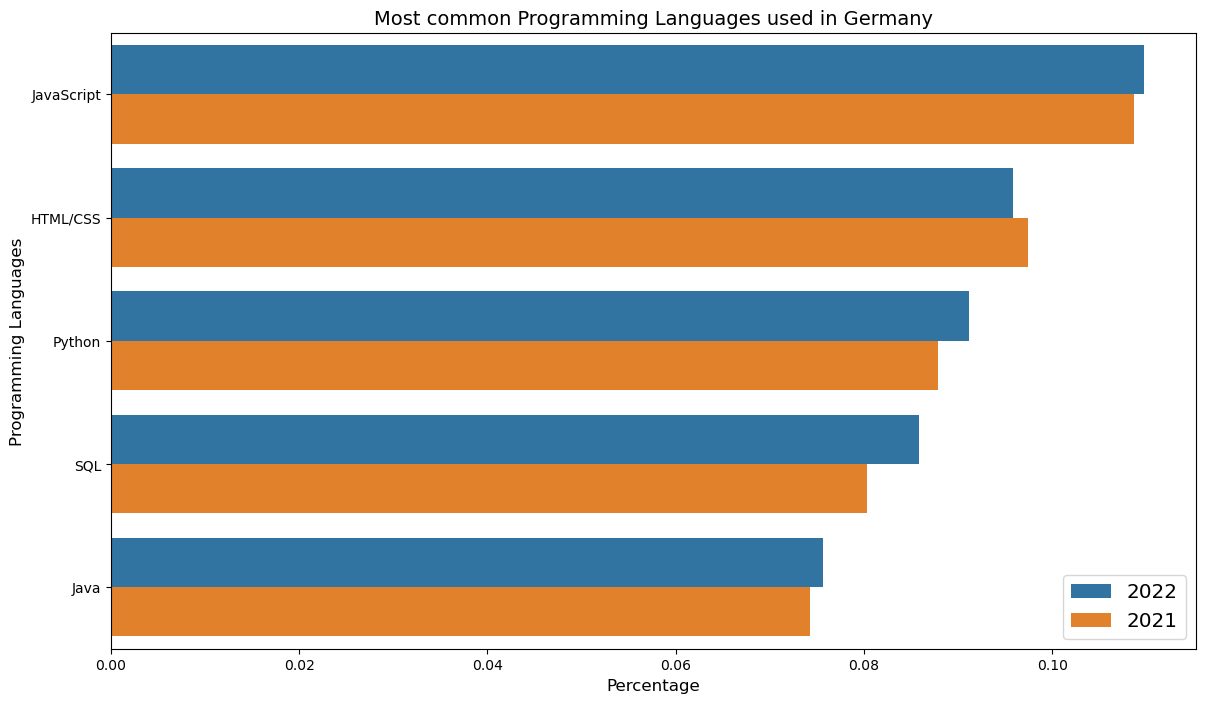

In [81]:
# Figure 1 — Percentage of use of programming languages among all the cited programming 
# languages by the respondents.

plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            hue = 'Year',
            data = worked_lang_chart.sort_values(by='Percentage', ascending=False))

plt.xlabel("Percentage", fontsize = 12)
plt.ylabel("Programming Languages", fontsize = 12)
plt.legend(fontsize='x-large', title_fontsize='30')
plt.title('Most common Programming Languages used in Germany', size = 14)
plt.show()

We can notice that languages like **JavaScript**, **HTML/CSS**, and **Python** are still in the top positions. Stack Overflow 2021 survey data and Stack Overflow 2022 survey data

We can see that in 2022 three programming languages have risen such as **JavaScript**, **Python**, and **SQL**, however, SQL and Python are more related together for the data analysis field which proves improvement in this field in Germany.

## 2. What are the most wanted programming languages in Germany?

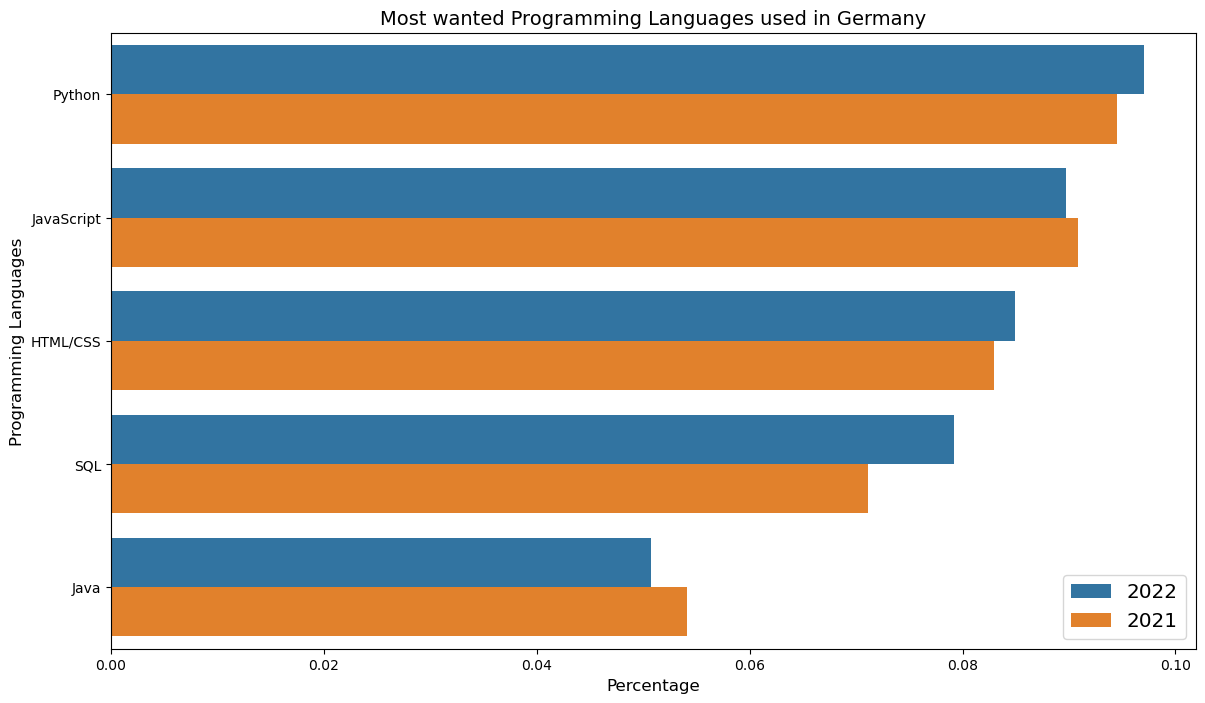

In [82]:
# Figure 2 — Percentage of desire of programming languages among all the cited programming 
# languages by the respondents.

plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            hue = 'Year',
            data = wanted_lang_chart.sort_values(by='Percentage', ascending=False))

plt.title('Most wanted Programming Languages used in Germany', size = 14)
plt.xlabel("Percentage", fontsize = 12)
plt.ylabel("Programming Languages", fontsize = 12)
plt.legend(fontsize='x-large', title_fontsize='30')
plt.show()

We can see that **Python**, **JavaScript**, and **HTML/CSS** are still at the top list of wanted languages.

Most of the programming languages that have appeared as programming languages most used at work, also appeared in the ranking of most wanted programming languages, this show us that are many people wanting to learn these languages.

## 3. How do programming languages used at work relate to programming languages people want to learn?

By looking at the raw data, we can spot some patterns such as for people that use python at work, for example, python is also cited as language that those people wanted to learn in the next year.

A natural question arise:

**“The pattern observed for python holds for the other languages?”**

To address this question, we built a heat map that indicate how the work programming languages ​​were related to the desired programming languages. The darker the position gets, the more related the programming language is.

In [83]:
# Grouping data to create a new dataframe

rows = []
for items in list(zip(worked_lang_2022, wanted_lang_2022)):
    for i in items[0]:
        rows.append({
            'Worked_PL': i, 
            'Wanted_PL': Counter(items[0])
        })
        
programming_language_transition = pd.DataFrame(rows).groupby('Worked_PL').agg({'Wanted_PL': 'sum'}).reset_index()

In [84]:
# Creating a matrix

for row in programming_language_transition['Worked_PL']:
    programming_language_transition[row] = 0

for index, row in programming_language_transition.iterrows():
    total = sum([value for key, value in dict(row['Wanted_PL']).items()])
    for key, value in dict(row['Wanted_PL']).items():
         programming_language_transition[key].loc[index] = (value / total)

C:\Users\midos\AppData\Local\Temp\ipykernel_14328\2264838786.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  programming_language_transition[key].loc[index] = (value / total)


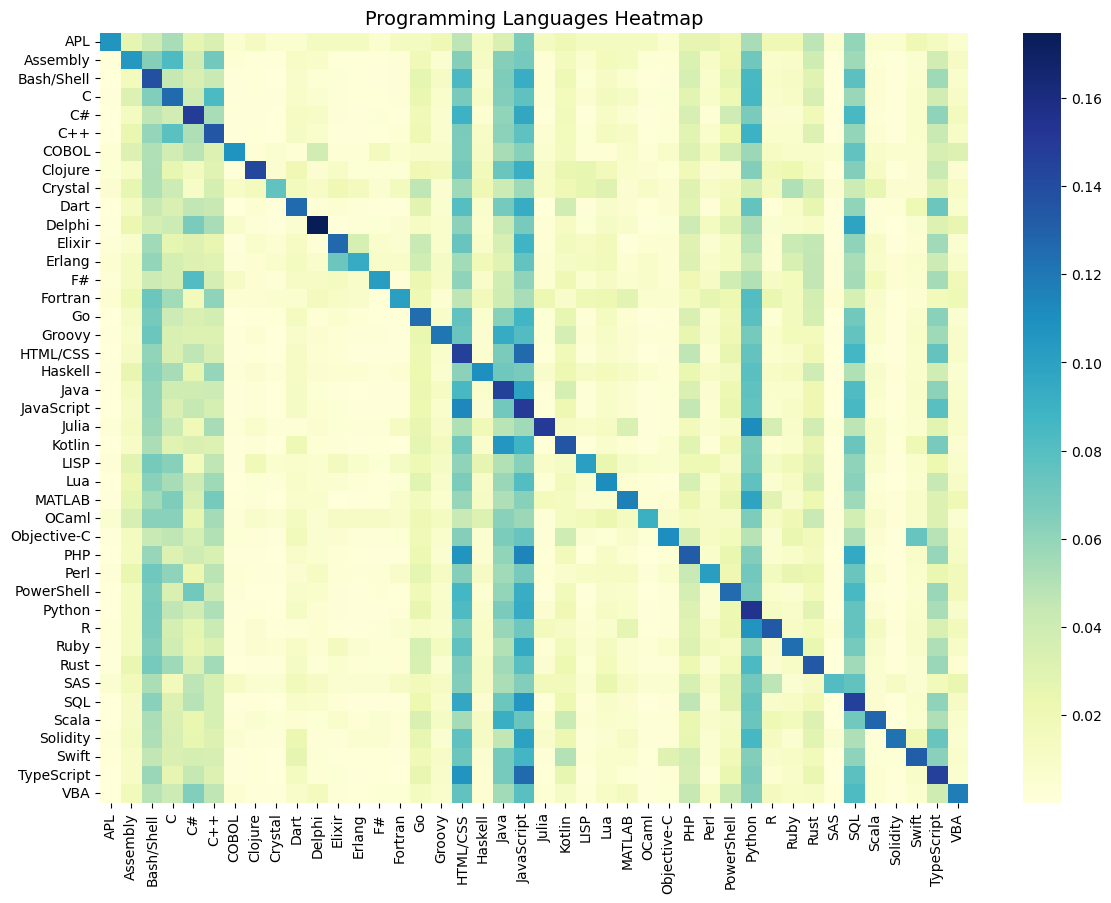

In [85]:
## Figure 3 — Percentage of relationship of work programming languages and desire programming 
## languages in 2021 and 2022.

matrix = programming_language_transition.drop('Wanted_PL', axis=1)\
                                        .set_index('Worked_PL')

plt.figure(figsize=(14, 10))
sns.heatmap(matrix, cmap="YlGnBu")
plt.title('Programming Languages Heatmap', size = 14)
plt.ylabel('')
plt.show()

With this figure we can have two insights:

1. As is evidenced by the diagonal line, people who already work with a programming language have a strong probability of wanting to learn the same programming language.

2. People who work with a programming language of a specific area, tend to want to learn programming languages of the same area. For example: **HTML/CSS**, and **TypeScript** are strongly correlated with **JavaScript**.

## 4. Which occupations are most popular in Germany?

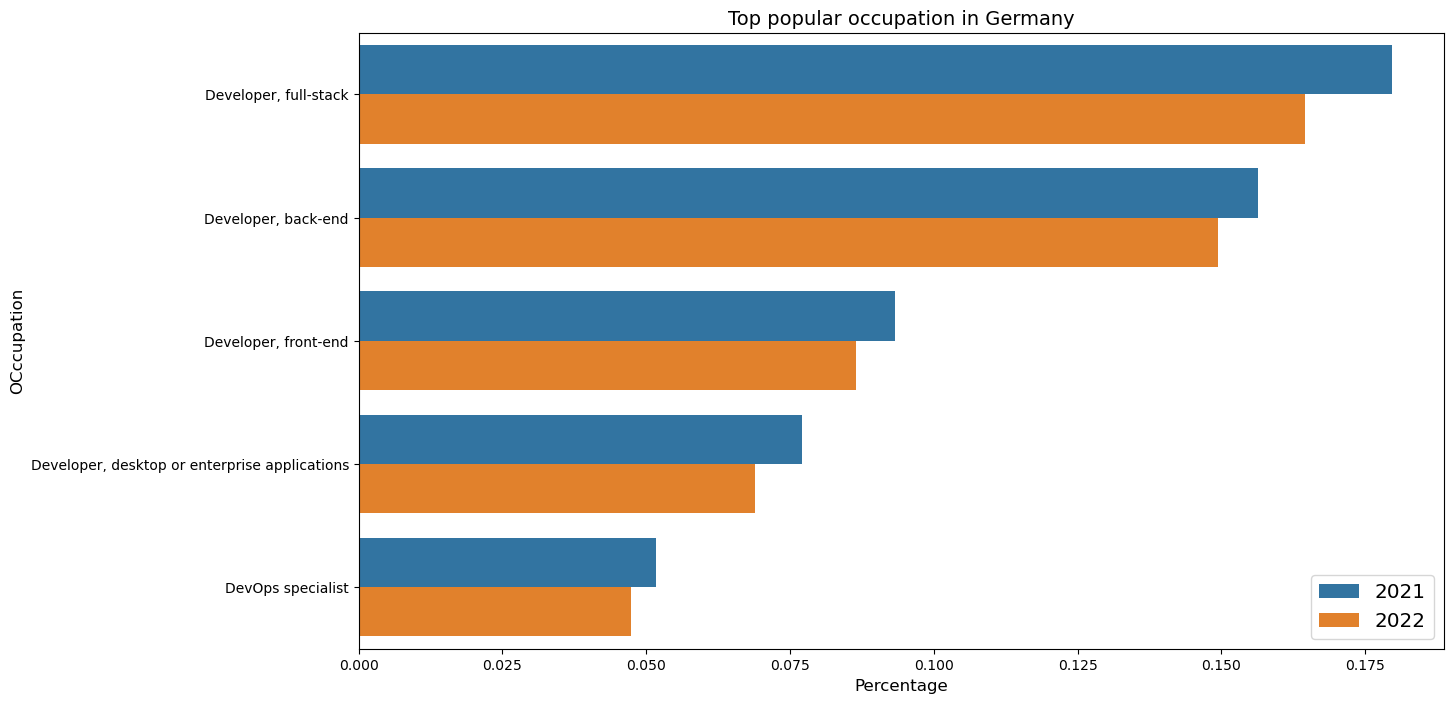

In [86]:
# Figure 4 — Percentage of occupation in Germany.


plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            hue = 'Year',
            data = occupation_chart.sort_values(by='Percentage', ascending=False))

plt.xlabel("Percentage", fontsize = 12)
plt.ylabel("OCccupation", fontsize = 12)
plt.legend(fontsize='x-large', title_fontsize='30')
plt.title('Top popular occupation in Germany', size = 14)
plt.show()

FullStack development is the most popular occupation among participants in 2021 and 2022.

Full-stack developer, Back-end developer, and Front-end developer is the most popular occupation among participants after 2022.

Desktop developers and DevOps specialists are the prevalent occupations among participants in 2021, whereas in 2022 it tends is slowing down.

## Conclusion

In this article, we took a look at what were the most popular and most biased programming languages, according to Stackoverflow's 2021 and 2022 Annual Developer Survey data.

1. We have seen that some programming languages such as **JavaScript**, **Python**, and **HTML/CSS** still dominate.
2. The learning trend is going on as per the demand for these languages in Germany. It seems that many old languages still have their value and are being much demand.
3. People who already work with a certain programming language have a tendency to learn that language or related languages within correlated areas to improve their own skills.
4. Full-stack web developer, Back-end developer, Front end developer are the most popular occupation among participants after 2022.

To see more about this analysis, see the link to my medium post available [here](https://medium.com/p/381ce4dc53fd/edit).

## References

Stackoverflow Developer Survey Data: [https://insights.stackoverflow.com/survey](https://insights.stackoverflow.com/survey) <br>
Medium: https://medium.com/p/381ce4dc53fd/edit<br>
Kaggle: https://medium.com/p/381ce4dc53fd/edit<br>

## Follow me

LinkedIn: https://www.linkedin.com/in/msala77/<br>
Medium: https://medium.com/@mo.okaily01<br>
Kaggle: https://www.kaggle.com/mosala7<br>